In [2]:
import math as m
import numpy as np
import cmath as cm
from matplotlib import pyplot as plt
from scipy import integrate 

In [13]:
rho_poly = lambda r: r**2-r
sigma_poly = lambda r: 3/2*r-1/2
thvec=np.linspace(0,2*m.pi,1000)
root_con = lambda z:max(abs((1+3/2*z+cm.sqrt(9/4*z**2+z+1)/2)),abs((1+3/2*z-cm.sqrt(9/4*z**2+z+1)/2)))

In [26]:
z=np.array([rho_poly(cm.exp(t*1j))/sigma_poly(cm.exp(t*1j)) for t in thvec])

In [15]:
root_con(-0.5)

0.7653882032022076

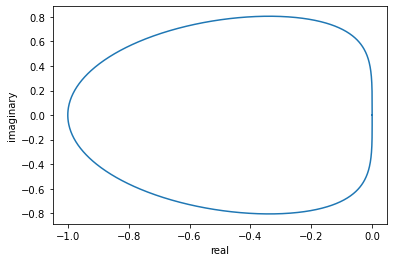

In [27]:
plt.plot(z.real,z.imag)
plt.xlabel('real')
plt.ylabel('imaginary')
plt.savefig('AB_2_boundary')

In [17]:
rho_poly_2 = lambda r: r**2-r
sigma_poly_2 = lambda r: 5/12*r**2+8/12*r-1/12
root_con_2 = lambda z: max(abs((1+2/3*z+cm.sqrt(23/48*z**2+z+1))/(2-5/6*z)),abs((1+2/3*z-cm.sqrt(23/48*z**2+z+1))/(2-5/6*z)))

In [24]:
z_2=np.array([rho_poly_2(cm.exp(t*1j))/sigma_poly_2(cm.exp(t*1j)) for t in thvec])

In [19]:
root_con_2(-3)

0.5601534739054566

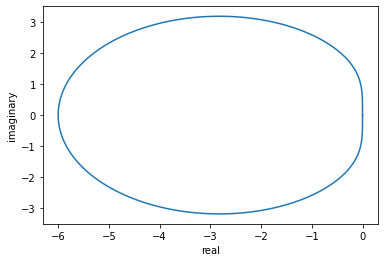

In [25]:
plt.plot(z_2.real,z_2.imag)
plt.xlabel('real')
plt.ylabel('imaginary')
plt.savefig('AM_2_boundary')

In [21]:
RK_2_T=lambda z:abs(1+z+1/2*z**2)
RK_3_T=lambda z:abs(1+z+1/2*z**2+1/6*z**3)
RK_4_T=lambda z:abs(1+z+1/2*z**2+1/6*z**3+1/24*z**4)

In [22]:
azure = [(0, 128/255, 1.0)]
jade = [(0, 168/255, 107/255)]
coral = [(1.0, 127/255, 80/255)]

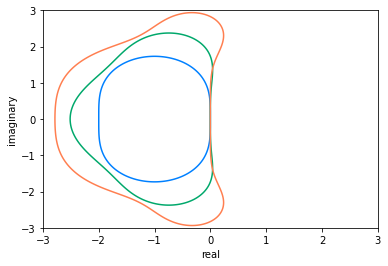

In [23]:
xv = np.linspace(-3, 3, 301)
yv = np.linspace(-3, 3, 301)
xx, yy = np.meshgrid(xv, yv)
zz=xx+yy*1j
plt.contour(xx,yy,RK_2_T(zz),[0,1],colors=azure)
plt.contour(xx,yy,RK_3_T(zz),[0,1],colors=jade)
plt.contour(xx,yy,RK_4_T(zz),[0,1],colors=coral)
plt.xlabel('real')
plt.ylabel('imaginary')
plt.savefig('RK_boundaries')

In [4]:
concentration_f= lambda t,y: np.array([-4e-2*y[0]+1e4*y[1]*y[2],4e-2*y[0]-1e4*y[1]*y[2]-3e7*y[1]**2,3e7*y[1]**2]) 

In [34]:
c_RK45=integrate.solve_ivp(concentration_f,[0,3],np.array([1,0,0]),method='RK45',max_step=1e-4)

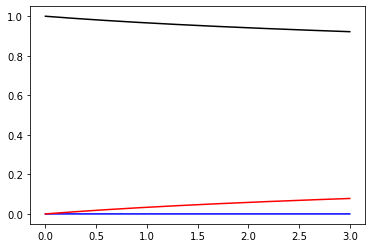

In [35]:
plt.plot(c_RK45.t,c_RK45.y[0],'k-')
plt.plot(c_RK45.t,c_RK45.y[1],'b-')
plt.plot(c_RK45.t,c_RK45.y[2],'r-')

In [36]:
len(c_RK45.t)

30001

In [43]:
c_BDF=integrate.solve_ivp(concentration_f,[0,3],np.array([1,0,0]),method='BDF')

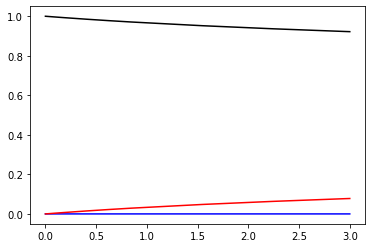

In [53]:
plt.plot(c_BDF.t,c_BDF.y[0],'k-')
plt.plot(c_BDF.t,c_BDF.y[1],'b-')
plt.plot(c_BDF.t,c_BDF.y[2],'r-')

In [46]:
len(c_BDF.t)

27

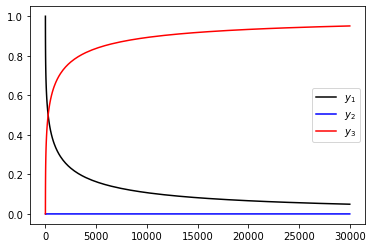

In [8]:
c_BDF_2=integrate.solve_ivp(concentration_f,[0,3e4],np.array([1,0,0]),method='BDF')
plt.plot(c_BDF_2.t,c_BDF_2.y[0],'k-',label='$y_1$')
plt.plot(c_BDF_2.t,c_BDF_2.y[1],'b-',label='$y_2$')
plt.plot(c_BDF_2.t,c_BDF_2.y[2],'r-',label='$y_3$')
plt.legend()
c_BDF_2.y[2][-1]
plt.savefig('stiff_solver_chemical_reaction_rate')

In [12]:
len(c_BDF_2.t)

95

In [11]:
c_BDF_2.y[2][-1]

0.9509191008000204